### Fitbod EDA

Main thought that guided my project was that EDA is about understanding the dataset better. 

So, my process would look like this:

- Review the data
- Clean the data (handle null/missing values, handle duplicates, correct problematic data)
- Generate summary statistics
- Create graphs
- Explore data further where insights emerge
- Ask questions throughout the exploration process (What’s happening? Why is this happening? How is it happening? Do relationships exist? Is this valid?)

I will write what I am doing and why in the markdown above the written Python code

Importing libraries I think I will use

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Loading dataset

In [2]:
workout = pd.read_csv('C:/Users/Josiah/Downloads/FitbodHW_Josiah_Patrick/fitbod_Josiah_Patrick_20220408-153503.csv')

Getting overall feel for dataset by looking at top and bottom of it. Also helps me see if anything looks odd

In [3]:
workout.head()

,Date,workoutId,exerciseId,singleSetId,exerciseName,reps,weight,fake_user_id
0,2021-03-04,bkWWlL1o6K,BTmBzxhAmZ,m5xx3tSpwr,Dumbbell Pullover,12,23.813628,fake_id_1007
1,2021-03-09,deSCvXHQI1,oDI8CKhqJi,p6EESR3QGF,Single Arm Preacher Curl,10,6.803894,fake_id_1041
2,2021-03-14,fbXXsDQzPU,DdtF1OFcuQ,aEon5S3nR5,Tricep Push Up,14,0.000000,fake_id_1006
3,2021-01-08,SPwrCnFXIO,qfkBJ4A5eQ,jdWs2DKdKV,Dead Bug,8,0.000000,fake_id_1037
4,2021-01-03,XzNK0q0Dfs,QUvE80fdlJ,3HlKGbTzFI,Tricep Kickback,14,6.803894,fake_id_1039


In [4]:
workout.tail()

,Date,workoutId,exerciseId,singleSetId,exerciseName,reps,weight,fake_user_id
38255,2021-08-29,LgIGdoUx7Y,9q2Cdgm0FM,C7dFxxnlch,Machine Leg Press,8,86.182653,fake_id_1011
38256,2021-06-24,0SJbUBXhiT,EAjKaB5zWy,14ijHppIkI,Dumbbell Kickbacks,13,11.339823,fake_id_1055
38257,2021-04-01,VmSGaut6Pk,djuvlRHUvb,ZwjzloCZIK,Dumbbell Rear Delt Raise,10,7.937876,fake_id_994
38258,2021-03-09,AcjXG1pDDt,XlazCsjHwn,R38RZQyfSn,Hang Snatch,10,20.411681,fake_id_1001
38259,2021-07-28,H03xqG82k9,243X43p1XP,jHcKnvgCSB,Seated Leg Curl,4,61.235043,fake_id_1055


Everything looked good to me above. Will now check for duplicates and null/missing values

In [5]:
workout.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
38255    False
38256    False
38257    False
38258    False
38259    False
Length: 38260, dtype: bool

In [6]:
workout.isnull().sum()

Date            0
workoutId       0
exerciseId      0
singleSetId     0
exerciseName    0
reps            0
weight          0
fake_user_id    0
dtype: int64

Looks like no duplicates or null/missing values exist. Will check summary stats now, which will also help verify absence of null values and duplicates.

Summary stats show 38,260 unique singlesetid's, so no duplicate code above has been confirmed. Also, looks like no null values are present either. The rows that show NaN for the most part are used for categorizing information, so they wouldn't present numerical values in the summary stats below. For example, there is no mean workoutId.

Other thoughts about summary stats:
- Interesting that unique, top, and freq values didn't show for reps and weight. Not sure if this has to do with the data types or the fact that the fields allow 6 decimal points (or neither). I won't dive too deep into the why for this exercise, but I will find those values below because I would like to know for potential further analysis.
- Also interesting that someone did a workout with 29 exercises. Won't tackle that issue here for the sake of time, but, in an actual EDA, I would look at that to see what happened and investigate if there were any other occurences where the number of exercises in a single workout seem unlikely.

In [7]:
workout.describe(include='all')

,Date,workoutId,exerciseId,singleSetId,exerciseName,reps,weight,fake_user_id
count,38260,38260,38260,38260,38260,38260.000000,38260.000000,38260
unique,365,5886,107,38260,107,NaN,NaN,80
top,2021-03-09,DYN6BtG89n,N6zu9IJNBz,m5xx3tSpwr,Leg Raise,NaN,NaN,fake_id_991
freq,217,29,1648,1,1648,NaN,NaN,2007
mean,NaN,NaN,NaN,NaN,NaN,10.608364,19.124974,NaN
std,NaN,NaN,NaN,NaN,NaN,5.095470,23.810318,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,8.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,10.000000,9.071858,NaN
75%,NaN,NaN,NaN,NaN,NaN,12.000000,29.483539,NaN


Checking for unique values in reps and weight fields

In [8]:
workout.nunique()

Date              365
workoutId        5886
exerciseId        107
singleSetId     38260
exerciseName      107
reps               46
weight            229
fake_user_id       80
dtype: int64

Checking for top and freq values not listed in reps field above. Code below shows how many times a user completed a set using n reps. The code will also show the rep value used most frequently, which is 10. 8,118 users completed a set using 10 reps.

In [9]:
workout.groupby(['reps']).size()

reps
0     1355
1       40
2      122
3      365
4      774
5     1523
6     1732
7     1072
8     5583
9     2137
10    8118
11    1555
12    5013
13     907
14     648
15    3638
16     492
17     288
18     477
19     175
20     993
21      97
22     282
23      72
24      91
25     253
26      89
27      11
28      18
29      15
30     131
31       9
32      16
33      13
34      13
35      20
36       6
37      18
38      23
39       3
40      12
41       2
43       2
44       4
45       3
50      50
dtype: int64

Checking for top and freq values not listed in weight field above. Two code cells below show how many times a user completed a set using a certain weight and the frequency (count) that that weight was used in a single set.

We can see that the most used weight was 0 pounds - used in 12,816 sets. Lots of bodyweight exercises!

In [10]:
workout.groupby(['weight']).size()

weight
0.000000      12816
0.453593          5
1.133982          8
1.360779          1
1.814372          8
              ...  
174.633270        2
180.303182        4
188.241057        3
190.509022        3
459.036024        3
Length: 229, dtype: int64

In [11]:
workout.groupby(['weight']).size().max()

12816

Side note, the only field I would consider dropping would be exerciseId because it's directly connected to exerciseName, which is infintely more helpful as a field in terms of analysis, but will leave it for now because it shouldn't cause any real issues.

Now I will create some simple graphs to help better understand the data broken down by analysis type.

#### Univariate Analysis

- Goal: Describe what is happening with one variable.

Bar chart belows shows the count of reps completed by set. For example, 8,118 users completed a set with 10 reps. Looks as is if most sets are completed using the 8-15 rep range. Could dive further into these numbers.
These numbers could help with the ML rep suggestion system.

<AxesSubplot:title={'center':'Rep Set Count'}, xlabel='Reps Used', ylabel='Set Count'>

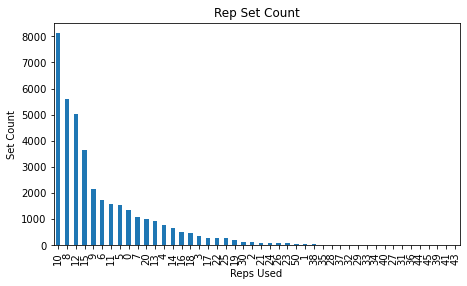

In [12]:
plt.subplot(221)

workout['reps'].value_counts().plot(kind='bar', title='Rep Set Count', figsize=(16,9), xlabel='Reps Used', ylabel='Set Count')

#### Bivariate Analysis
- Goal: Search for relationships between two variables.

Running a scatterplot and a correlation heatmap to see if a relationship exists between reps completed and weight used.

Based on the results, there is a mild negative relationship between reps completed and weight used, which would make sense. We would expect to see more reps done with 10 pounds than with 1,000 pounds. Although, I did expect the relationship to be a little stronger.

Also, looks like both reps and weight could have outliers. One user completed 50 reps in a single set. Another user used over 400 pounds in weight in a single set. Neither of these are unbelievable, although very impressive, so I will leave them.

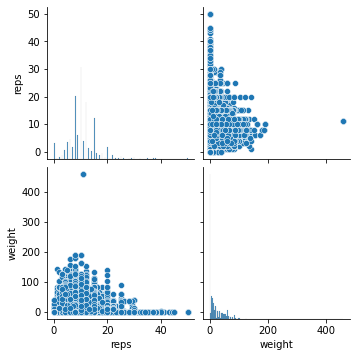

In [13]:
subset = workout[['reps', 'weight']]
sns.pairplot(subset)
plt.show()

<AxesSubplot:>

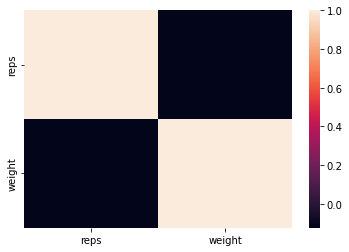

In [14]:
corr = workout.corr()
sns.heatmap(corr)

#### Multivariate Analysis
- Goal: Investigate if a relationship between three or more variables exists.

Side note, this is not the greatest example or graph of multivariate analysis, but it was the best one I could think of with this dataset. A better example would be can you predict how often someone will workout based on age and weight?

Pressing on, I created a bar chart below to show the relationship between the exercise type (name) and the average reps completed and average weight used. I removed the legend from the first bar chart because it looks ridiculous, but it's included in the second bar chart below (they're the same graph just one is legend-less).

The relationship I'm looking for is if a user is doing a certain exercise, say barbell squat, what weight would be used on average and how many reps would be completed on average?

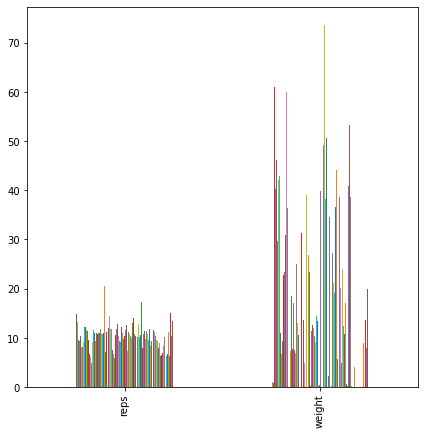

In [15]:
workout.groupby('exerciseName')[['reps', 'weight']].mean().T.plot(kind='bar', figsize=(7,7)).legend().remove()

<AxesSubplot:>

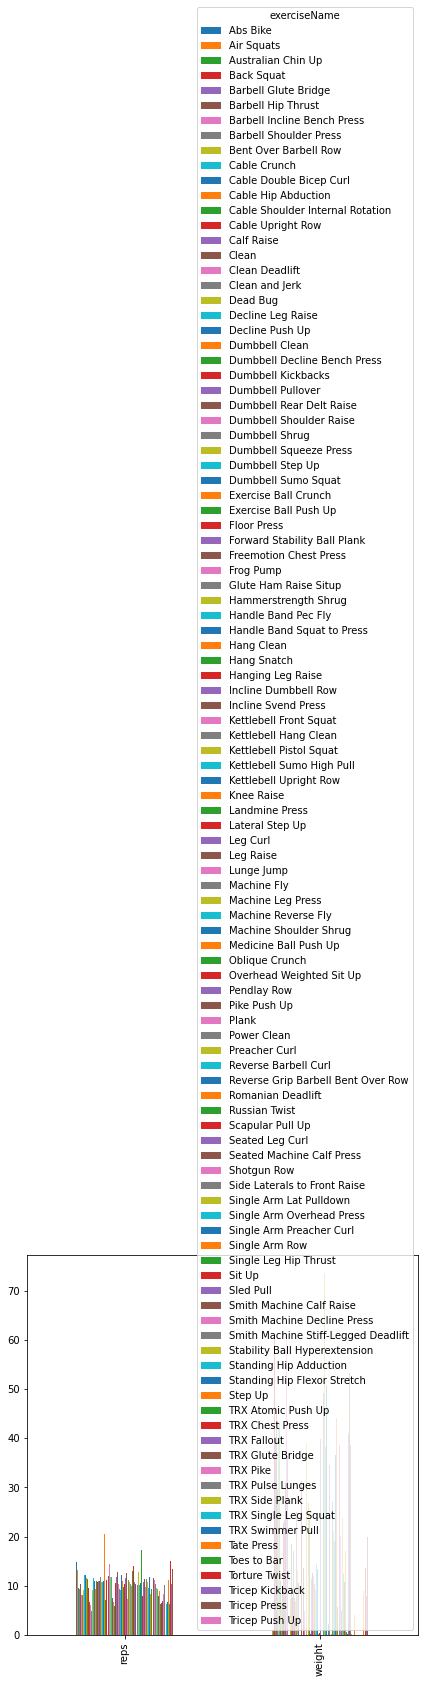

In [16]:
workout.groupby('exerciseName')[['reps', 'weight']].mean().T.plot(kind='bar', figsize=(7,7))